# Grafiken

```{admonition} Lernziele
:class: important
* TODO
```

## Rastergrafik vs. Vektorgrafik

Prinzipiell gibt es zwei Arten, Bilder zu digitalisieren, nämlich ihre
Darstellung als Rastergrafik oder die Beschreibung durch eine Vektorgrafik.

Bei der Rastergrafik besteht ein Bild aus vielen Bildpunkten, die in einem
Raster angeordnet sind. Ein Bildpunkt wird auch als Pixel bezeichnet. Jeder
Pixel hat seine Position und beschreibt die Farbe des dortigen Bildausschnitts.
Je mehr Pixel ein Bild hat, desto größer ist seine Auflösung und desto höher
normalerweise die Bildqualität. Da jedoch die Anzahl der Pixel begrenzt ist,
können wir nicht beliebig einen Bildausschnitt vergrößern. Ab einem bestimmten
Vergrößerungsfaltor wird es zu sogeannten Pixelartefakten kommen. Trotz dieser
Nachteile sind Rastergrafiken sehr verbreitet -- vor allem in der Fotografie
werden hauptsächlich verwendet. Um dennoch nicht übermäßig Speicherplatz zu
belegen, gibt es Algorithmen, die Dateigröße geschickt durch Kompression der
Daten zu reduzieren. Typische Speicherformate für Rastergrafiken sind jpg, png
oder gif. 

Bei einer Vektorgrafik werden die Bildelemente durch geometrische Konstruktionen
wie biespielsweise Linien, Kurven oder Polygonen beschrieben. Daher eignen sich
Vektorgrafiken besonders für Logos oder Illustrationen. Ihr großer Vorteil liegt
darin, dass sie durch die geometrische Beschreibung beliebig vergrößerbar sind.
Am häufgsten werden Vektorgrafiken im SVG-Format gespeichert, das für Scalable
Vector Graphics steht.

## Bilder einlesen mit Scikit-Image

Scikit-Image ist eine Bibliothek für die Bildverarbeitung in Python. Sie
ermöglicht es, Bilder einzulesen und darszutellen. Sie bietet auch weitere
Funktionen wie die Anwendung von Filtern oder die Analyse von Bildeigenschaften.
Die Bibliothek wird von Freiwilligen entwickelt und ist Open Source. Mehr
Details finden Sie auf der Homepage von
[Scikit-Image](https://scikit-image.org).

Es gibt auch Alternativen zu Scikit-Image. Am bekanntesten ist die Bibliothek
[OpenCV](https://opencv.org). Für größere Projekte ist OpenCV empfehlenswert,
denn OpenCV unterstützt nicht nur Python, sondern auch C++ und ermöglicht somit
besser als Scikit-Image die Verarbeitung von großen Datenmengen. Von den
Funktionalitäten bietet es einen größeren Umfang als Scikit-Image. Im Gegensatz
dazu ist die Bedienung von Scikit-Image leichter zu erlernen und Scikit-Image
ist stärker auf statistische Methoden ausgerichtet, so dass wir in diesem
Kapitel Scikit-Image benutzen. Standardmäßig ist Scikit-Image nicht installiert.
Installationshinweise finden Sie auf der Homepage [Scikit-Image → Installing
scikit-image](https://scikit-image.org/docs/dev/install.html).

Die Bibliothek Scikit-Image heißt `skimage`. Die Funktionen zum Lesen und
Schreiben von Bildern befinden sich im Untermodul `io`. Eine Liste der
implemntierten Funktionen finden Sie unter [Dokumentation/Scikit-Image →
io](https://scikit-image.org/docs/stable/api/skimage.io.html). Wir verwenden
zunächst die Funktion `imread()`, um die Datei 'muenzen_und_mehr_medium.jpg'
einzulesen. Mit `imshow()` lassen wir das Foto anzeigen.

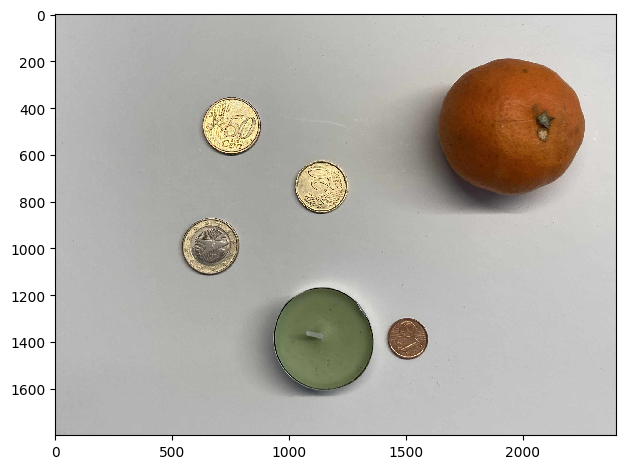

In [1]:
from skimage.io import imread, imshow                                             

foto = imread("muenzen_und_mehr_medium.jpg")   
imshow(foto);                                

Das Foto zeigt einige Münzen, ein Teelicht und eine Mandarine. Die x- und y-Achse werden in Pixeln angegeben. Aber was ist eigentlich genau in der Variable `foto` gespeichert?

Mit der Funktion `type()` ermitteln wir den Datentyp.

In [2]:
print(type(foto))

<class 'numpy.ndarray'>


Also ein NumPy-Array. Als nächstes bestimmen wir die Größe des Arrays mit der
Funktion `shape()` aus dem NumPy-Modul.

In [3]:
import numpy as np

print( np.shape(foto) )

(1800, 2400, 3)


Die Variable speichert also drei Matrizen mit 1800 Zeilen und 2400 Spalten. Wir ermitteln schnell noch die minimalen und maximalen Einträge in jeder der drei Matrizen.

In [4]:
for kanal in range(3):
    minimal_wert = np.min( foto[:,:,kanal])
    maximal_wert = np.max( foto[:,:,kanal])

    print('Kanal: {}'.format(kanal))
    print('minimaler Wert: {} und maximaler Wert: {}'.format(minimal_wert, maximal_wert))
   

Kanal: 0
minimaler Wert: 0 und maximaler Wert: 255
Kanal: 1
minimaler Wert: 0 und maximaler Wert: 255
Kanal: 2
minimaler Wert: 0 und maximaler Wert: 245


Die Werte liegen zwischen 0 und 255.

Die Funktion `imread()` hat das Bild als sogenanntes RGB-Bild importiert. Die
drei Buchstaben stehen dabei für die Farben Rot, Grün und Blau. Jeder Eintrag
der drei Matrizen beschreibt den Intensitätswert, den der Bildpunkt an dieser
Stelle hat. Die erste Matrix enthält dabei die Information, welche Bildpunkte
keine Farbe haben (Wert 0) oder welche maximal rot sind (Wert 255). Analog dazu
beschreibt die zweite Matrix die Grüntöne und die dritte Matrix die Blautöne.
Manchmal werden anstatt der Integer-Zahlen von 0 bis 255 auch Floats von 0.0 bis
1.0 verwendet, um die Intensität zu kodieren.

Wir betrachten uns die drei Farbkanäle einzeln:

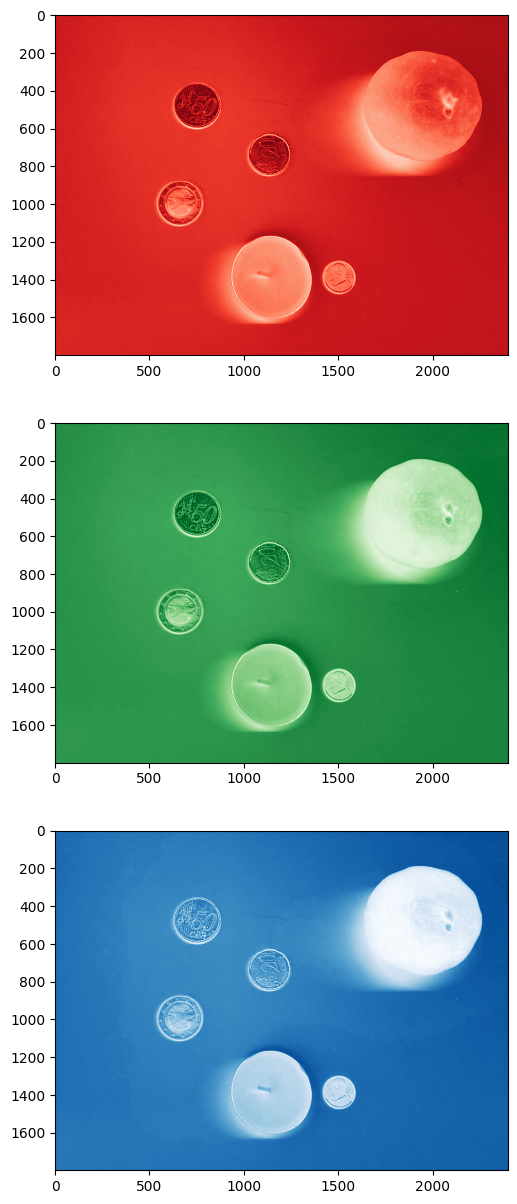

In [5]:
import matplotlib.pylab as plt

kanal_rot   = foto[:, :, 0]
kanal_gruen = foto[:, :, 1]
kanal_blau  = foto[:, :, 2]

fig, ax = plt.subplots(3,1, figsize=(20, 15))

ax[0].imshow(kanal_rot, cmap='Reds')
ax[1].imshow(kanal_gruen, cmap='Greens')
ax[2].imshow(kanal_blau, cmap='Blues');

Wir erkennen beispielsweise, dass die orangefarbene Mandarine keinen Blauanteil
hat.

## Graustufenbild

Für die weitere Bildverarbeitung verwandeln wir das RGB-Bild in ein sogenanntes
Graustufenbild. Dabei werden die Farbinformationen durch eine Beschreibung der
Helligkeitswerte der Pixel ersetzt. Der Grauwert kann gemäß [Wikipedia →
Grauwert](https://de.wikipedia.org/wiki/Grauwert) aus den Farben Rot, Grün und
Blau mit der Formel

Grauwert = 0.299 x Rotanteil + 0.587 x Grünanteil + 0.114 x Blauanteil

berechnet werden.

Transformieren wir das RGB-Bild in ein Graustufenbild, brauchen wir uns nur noch
mit einer Matrix anstatt von drei Matrizen beschäftigen. Somit wird auch der
benötigte Speicherplatz reduziert. Darüber hinaus verwenden wir
Graustufenbilder, da sie eine effektivere Basis für viele
Bildverarbeitungsalgorithmen darstellen und auch den benötigten Speicherplatz
reduzieren.

Scikit-Image stellt dafür die Funktion `rgb2gray()` zur Verfügung, die wir aus
dem Untermodul `skimage.color` laden:

Shape des Graustufenbildes: 
(1800, 2400)


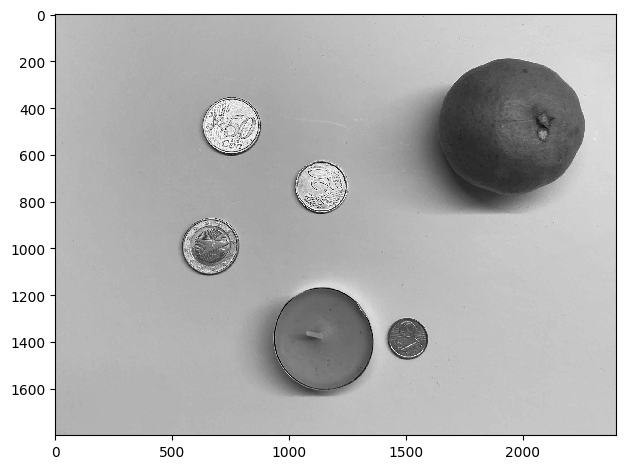

In [6]:
from skimage.color import rgb2gray

foto_grau = rgb2gray(foto)

print('Shape des Graustufenbildes: ')
print(np.shape(foto_grau))

imshow(foto_grau);